# EDA успеваемости по математике

## Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Описание датасета

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

Ячейка кода ниже загружает необходимые библиотеки Python и загрузить данные датасета. 
Последний столбец из этого набора данных будет нашей целевой величина (независимо от того, закончил ли студент или не закончил). 
Все остальные колонки-это характеристики о каждом студенте.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import os

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('stud_math.csv')
stud.sample(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
250,GP,M,18,U,GT3,T,3.0,2.0,services,NaN,course,mother,2.0,1.0,1.0,no,no,no,no,yes,-3.0,NaN,yes,no,4.0,4.0,5.0,5.0,0.0,40.0
238,GP,F,17,R,GT3,T,2.0,1.0,at_home,services,course,mother,3.0,2.0,0.0,no,no,no,yes,yes,-6.0,yes,no,no,2.0,1.0,1.0,3.0,2.0,55.0


Убираем столбец не названый в описании датасета

In [3]:
stud.drop(['studytime, granular'], inplace=True, axis=1)

Приведем название колонок к одному виду

In [5]:
stud.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']
stud.head(2)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0


Добавим функции для упрощения дальнейших расчетов

In [6]:
def chgNonenuniq(row):
    '''Заменяем NaN на None.
Подсчитываем количество уникальных значений'''
    if stud[row].dtype != object:
        stud[row].hist()
        display(pd.DataFrame(stud[row].value_counts()))
        print("Уникальных значений:", stud[row].nunique())
        stud.loc[:, [row]].info()
    else:
        stud[row] = stud[row].astype(str).apply(lambda x: None if x.strip(
        ) == '' else None if x == 'nan' or x == 'NaN' else x)
        display(pd.DataFrame(stud[row].value_counts()))
        print("Уникальных значений:", stud[row].nunique())
        stud.loc[:, [row]].info()

def outliers(row):
    '''Находим границы выбросов и значения лежащий в межквартильном размахе    '''

    median = stud[row].median()
    perc25 = stud[row].quantile(0.25)
    perc75 = stud[row].quantile(0.75)
    IQR = perc75 - perc25
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
          "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    stud[row].loc[stud[row].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=16, range=(stud[row].min()-10, stud[row].max()+10),
                                                                              label='IQR')
    plt.legend()

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[1], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[0], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

#### Рассмотрим каждый признак

Для начала приведем пустые значения предсказываемой величины к нулю, для дальнейших расчетов корреляционного анализа.
В расчет принимаем что значение 0 означает что человек не пришел на экзамен и не получил баллы.

In [9]:
stud.score = stud.score.apply(lambda x: 0 if pd.isnull(x) else x)

In [24]:
chgNonenuniq(row='school')

,school
GP,349
MS,46


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [25]:
chgNonenuniq(row='sex')

,sex
F,208
M,187


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Уникальных значений: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

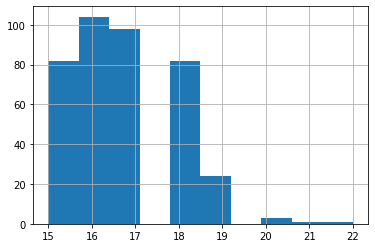

In [26]:
chgNonenuniq(row='age')
stud['age'].describe()

По графику видно, что основное количество учеников находится в возрасте от 15 до 19 лет,  
проверим данную категорию на наличие выбросов.

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


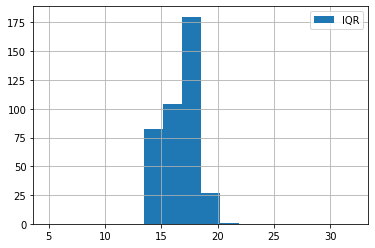

In [12]:
outliers(row='age')

Технически ученика 22 лет можно считать исключением из датесета по данной категории,  
но в условии сказано, что 22 входит в диапозон учащихся в возрасте от 15 до 22 лет,   
следовательно 22 мы не выбрасываем из данного датасета. 

Пустые значение приведем к значению обозначающему отсутвие адреса,   
поскольку удаление строк с отсутвующими данными   
или замена наиболее популярным значением может сильно сказаться на точности анализа.

In [27]:
stud.address = stud.address.apply(lambda x: "noadress" if pd.isnull(x) else x)

chgNonenuniq(row='address')

stud.address.sort_values()

,address
U,295
R,83
noadress,17


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


197           R
130           R
129           R
128           R
273           R
         ...   
348    noadress
159    noadress
254    noadress
376    noadress
96     noadress
Name: address, Length: 395, dtype: object

In [28]:
stud.famsize = stud.famsize.apply(lambda x: "nofamsize" if pd.isnull(x) else x)

chgNonenuniq(row='famsize')

,famsize
GT3,261
LE3,107
nofamsize,27


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [29]:
stud.pstatus = stud.pstatus.apply(lambda x: "nopstatus" if pd.isnull(x) else x)

chgNonenuniq(row='pstatus')

,pstatus
T,314
nopstatus,45
A,36


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


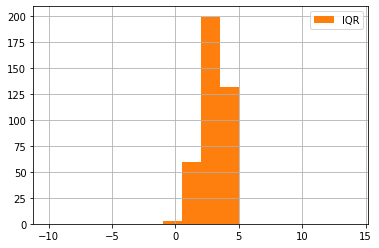

In [15]:
chgNonenuniq(row='medu')
stud['medu'].describe()

outliers(row='medu')

В данной категории выбросов нет, поскольку минимальные и максимальные значения внутри границ выбросов.

Заменим пустые значения на медиану.

In [16]:
stud.medu = stud.medu.apply(lambda x: stud.medu.median() if pd.isnull(x) else x)

,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

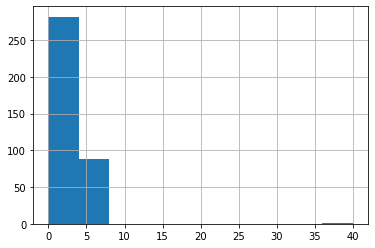

In [17]:
chgNonenuniq(row='fedu')
stud['fedu'].describe()

Заменим пустые значения на медиану.

In [18]:
stud.fedu = stud.fedu.apply(lambda x: stud.fedu.median() if pd.isnull(x) else x)

Видно что присутствует всего одно значение отличающееся от остальных. Допустим, что такое большое значение является опечаткой 
и на самом деле соответсвует последнему ответу.

In [19]:
stud.loc[(stud['fedu'] == stud.fedu.max()),'fedu'] = 4
stud.fedu.head(12)

0     4.0
1     1.0
2     1.0
3     2.0
4     3.0
5     3.0
6     2.0
7     4.0
8     2.0
9     4.0
10    4.0
11    4.0
Name: fedu, dtype: float64

,fedu
2.0,130
3.0,96
4.0,89
1.0,78
0.0,2


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


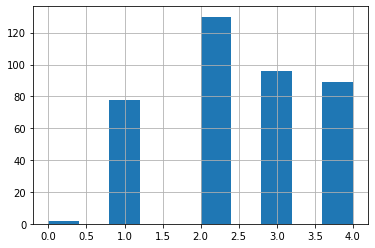

In [21]:
chgNonenuniq(row='fedu')

In [22]:
chgNonenuniq(row='mjob')

,mjob
other,133
services,98
at_home,58
teacher,55
health,32
None,19


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Пустые значение приравняем к значению 'other'

In [23]:
stud.mjob = stud.mjob.apply(lambda x: 'other' if pd.isnull(x) else x)

In [30]:
chgNonenuniq(row='fjob')

,fjob
other,197
services,102
teacher,29
at_home,16
health,15


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Пустые значение приравняем к значению 'other'

In [31]:
stud.mjob = stud.mjob.apply(lambda x: 'other' if pd.isnull(x) else x)

In [32]:
chgNonenuniq(row='fjob')

,fjob
other,197
services,102
None,36
teacher,29
at_home,16
health,15


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Пустые значение приравняем к значению 'other'

In [33]:
stud.fjob = stud.fjob.apply(lambda x: 'other' if pd.isnull(x) else x)

In [34]:
chgNonenuniq(row='reason')

,reason
course,137
home,104
reputation,103
other,34


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Пустые значение приравняем к значению 'other'

In [ ]:
stud.reason = stud.reason.apply(lambda x: 'other' if pd.isnull(x) else x)

In [ ]:
chgNonenuniq(row='guardian')

In [ ]:
chgNonenuniq(row='traveltime')
stud['traveltime'].describe()

Заменим пустые значения на медиану

In [ ]:
stud.traveltime = stud.traveltime.apply(lambda x: stud.traveltime.median() if pd.isnull(x) else x)
outliers(row='traveltime')

Заменим пустые значения на медиану

stud.traveltime = stud.traveltime.apply(lambda x: stud.traveltime.median() if pd.isnull(x) else x)

outliers(row='traveltime')
stud.traveltime.sort_values()

Мы видим что значение "4" для данного показетеля является выбросом, но устранять его из основного датасета 
не будем поскольку данный признак является категориальным и значимым.

In [ ]:
chgNonenuniq(row='studytime')
stud['studytime'].describe()

Заменим пустые значения на медиану.

In [ ]:
stud.studytime = stud.studytime.apply(lambda x: stud.studytime.median() if pd.isnull(x) else x)

outliers(row='studytime')

Мы видим что значение "4" для данного показетеля является выбросом, но устранять его из основного датасета 
не будем поскольку данный признак является категориальным и значимым.


In [ ]:
chgNonenuniq(row='failures')
stud['failures'].describe()

In [ ]:
outliers(row='failures')

Данный показатель является не очень точным, поскольку показывает количество внеучебных неудач либо от одного до трех, 
либо все остальное, включая большее количество неудач и меньшее.
Поскольку последние значения сильно преобладают, то и все остальные значения можно считать выбросом, 
но это будет не верно для нашего анализа.

Пустые значение приравниваем к 0, как к наиболее часто встречающемуся значению.

In [ ]:
stud.failures = stud.failures.apply(lambda x: 0 if pd.isnull(x) else x)

In [ ]:
chgNonenuniq(row='schoolsup')

Отсуствие упоминания о доп. образовании прировняем к отсутвию доп. образования.

In [ ]:
stud.schoolsup = stud.schoolsup.apply(lambda x: "no" if pd.isnull(x) else x)

In [ ]:
chgNonenuniq(row='famsup')

С этой категорией поступаем так же

In [ ]:
stud.famsup = stud.famsup.apply(lambda x: "no" if pd.isnull(x) else x)

In [ ]:
chgNonenuniq(row='paid')

In [ ]:
stud.paid = stud.paid.apply(lambda x: "no" if pd.isnull(x) else x)

In [ ]:
chgNonenuniq(row='activities')

Пустые значение приводим к значению обозначающему отсутвие, поскольку удаление строк с отсутвующими данными 
или замена наиболее популярным значением может сильно сказаться на точности анализа.

In [ ]:
stud.activities = stud.activities.apply(lambda x: "noactivities" if pd.isnull(x) else x)

In [ ]:
chgNonenuniq(row='nursery')

Поступаем по аналогии с предидущим

In [ ]:
stud.nursery = stud.nursery.apply(lambda x: "nonursery" if pd.isnull(x) else x)

In [ ]:
chgNonenuniq(row='higher')

Отсуствие упоминания о желании получения высшего прировняем к отсутвию желания получения высшего.

In [ ]:
stud.higher = stud.higher.apply(lambda x: "no" if pd.isnull(x) else x)

In [ ]:
chgNonenuniq(row='internet')

Пустые значение приводим к значению обозначающему отсутвие, поскольку удаление строк с отсутвующими данными 
или замена наиболее популярным значением может сильно сказаться на точности анализа.

In [ ]:
stud.internet = stud.internet.apply(lambda x: "nointernet" if pd.isnull(x) else x)

In [ ]:
chgNonenuniq(row='romantic')

Отсуствие упоминания о романтических отношениях прировняем к отсутвию романтических отношенияй.

In [ ]:
stud.romantic = stud.romantic.apply(lambda x: "no" if pd.isnull(x) else x)

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

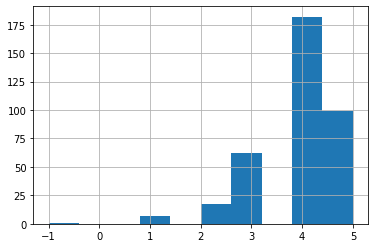

In [36]:
chgNonenuniq(row='famrel')
stud['famrel'].describe()

In [ ]:
outliers(row='famrel')

Предположим что значение -1 один является ошибкой и поменяем его на 1

In [ ]:
stud.loc[(stud['famrel']==-1),'famrel'] = 1

Заменим пустые значения на медиану

In [ ]:
stud.famrel = stud.famrel.apply(lambda x: stud.famrel.median() if pd.isnull(x) else x)

In [ ]:
Как видно что все значения ниже 2.5, а именно 2 и 1, считаются выбросами, отбросим только 1

In [ ]:
a = len(stud)
stud = stud.loc[stud['famrel']>=2]
print(f'{a - len(stud)} - количество устранненых выбросов')

Предположим что значение -1 один является ошибкой и поменяем его на 1

In [ ]:
stud.loc[(stud['famrel']==-1),'famrel'] = 1

Заменим пустые значения на медиану

In [ ]:
stud.famrel = stud.famrel.apply(lambda x: stud.famrel.median() if pd.isnull(x) else x)

Как видно что все значения ниже 2.5, а именно 2 и 1, считаются выбросами, отбросим только 1

In [ ]:
a = len(stud)
stud = stud.loc[stud['famrel']>=2]
print(f'{a - len(stud)} - количество устранненых выбросов'

In [ ]:
chgNonenuniq(row='freetime')
stud['freetime'].describe()

In [ ]:
outliers(row='freetime')

In [ ]:
stud.freetime = stud.freetime.apply(lambda x: stud.freetime.median() if pd.isnull(x) else x)

Мы видим, что все значения меньше полутора являются выбросом,  
но по моему мнению количество значений достачное, чтобы их не считать выбросом.

In [ ]:
chgNonenuniq(row='goout')
stud['goout'].describe()

In [ ]:
outliers(row='goout')

In [ ]:
stud.goout = stud.goout.apply(lambda x: stud.goout.median() if pd.isnull(x) else x)

Для данного показетелем все распределенно равномерно, выбросов -  нет.

In [ ]:
chgNonenuniq(row="health")
stud['health'].describe()

In [ ]:
outliers(row='health')

In [ ]:
stud.health = stud.health.apply(lambda x: stud.health.median() if pd.isnull(x) else x)

Схожая ситуация с предыдущим показателем, все распределенно равномерно, выбросов -  нет.

In [ ]:
chgNonenuniq(row="absences")
stud['absences'].describe()

In [ ]:
outliers(row='absences')

In [ ]:
stud.absences = stud.absences.apply(lambda x: stud.absences.median() if pd.isnull(x) else x)

Отбросим очевидно большие значенияb

In [ ]:
a = len(stud)
stud = stud.loc[stud['absences']<=100]
print(f'{a - len(stud)} - количество устранненых выбросов')

### Произведена первичная обработка данных
### Найдены уникальные значения
### Приступим к кореляционному анализу

In [ ]:
stud.head()

In [ ]:
stud_filter=stud.drop(['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health'], axis=1)
stud_filter.head()

In [ ]:
sns.pairplot(stud_filter, kind = 'score')

Используем для наглядности матрицу корреляций:

In [ ]:
stud_filter.corr()

Все переменные слабоскоррелированные

In [ ]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health']:
    get_boxplot(col)

In [ ]:
Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.   
Проверим нулевую гипотезу о том, что распределения баллов по госэкзамену по математике по различным параметрам неразличимы:

In [ ]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health']:
    get_stat_dif(col)

Оставим эти переменные в датасете для дальнейшего построения модели.   
Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это:   
sex, medu, mjob, guardian, failures, schoolsup, romantic, goout.

In [ ]:
stud_model = stud.loc[:, ['sex', 'medu', 'mjob', 'guardian', 'failures', 'schoolsup', "romantic", 'goout','score']]
stud_model.head(2)

Пройдемся по каждой из этих переменных:  
    * sex - пол имеет два значения и не имеет выбросов.  
    * medu - имеет 5 различных уникальных значений в зависимости от образования матери, в данной категории выбросов нет   
    * mjob - имеет 5 различных уникальных значений в зависимости от работы матери, в данной категории выбросов нет     
    * guardian - имеет 3 различных уникальных значения в зависимости от опекунства, в данной категории выбросов нет   
    * failures - Как уже говорилось данный показатель является не очень точным,   
        поскольку показывает количество внеучебных неудач либо от одного до трех, либо все остальное,включая большее количество неудач и меньшее.  
    * schoolsup - имеет 2 различных уникальных значения в зависимости от наличия дополнительной образовательной поддержки  
    * romantic - имеет 2 различных уникальных значения в зависимости от наличия  романтических отношенияй   
    * goout - имеет 5 различных уникальных значений в зависимости  времени проводимого с друзьями  

sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
